**Gold Index Change Results Analysis**

In the following notebook we will analyze the preformance of a single SSM (Falcon3-Mamba-7B-Instruct) and a single LLM (Llama-3.1-8B-Instruct).<br>
Those are two instruction models with similar sizes (7.27B vs 8.03B params).<br>
For each model we'll examine the `gold_index_change` task with 10,20 and 30 documents AND will compare the `openbook_random` and `closedbook` prompting modes.<br>
After those are done - we'll compare the SSM and LLM performance. 

# Utils

* matplotlib plots
* test results statistics calculation
* test result object loading

In [1]:
from pathlib import Path
from typing import Dict, List, Optional, Tuple, Any

import matplotlib.pyplot as plt
import statistics
import json

In [5]:
def load_test_results(results_file_path: str) -> Dict[str, Any]:
    with open(results_file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

In [12]:
def get_scores_mean(scores: List[float]) -> float:
    return statistics.mean(scores)

In [30]:
def plot_metric_over_documents(
    x_values: List[int],
    y_series: List[List[float]],
    series_labels: List[str],
    title: Optional[str] = "Metric over Documents",
    xtitle: Optional[str] = "Gold Index",
    ytitle: Optional[str] = "Metric Mean",
    closedbook_mean: Optional[float] = None,
    figsize: Optional[Tuple[int, int]] = (10, 6)
) -> None:

    plt.figure(figsize=figsize)
    
    for y_values, label in zip(y_series, series_labels):
        plt.plot(x_values, y_values, marker="o", label=label)

    if closedbook_mean is not None and len(y_series) == 1:
        plt.axhline(
            y=closedbook_mean,
            color="red",
            linestyle="--",
            label="closedbook"
        )

    plt.title(title, weight="bold")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Utils tests

In [20]:
test_file_path = list(Path("./results").rglob(f"*json"))[0]
results = load_test_results(test_file_path)
results

{'model': 'tiiuae/Falcon3-Mamba-7B-Instruct',
 'experiment_type': 'gold-idx-change',
 'num_documents': 10,
 'prompting_mode': 'openbook-random',
 'execution_date': '2025-04-16 22:56:10',
 'experiments': {'gold_at_4': {'model_answers': ['\nSvante Arrhenius',
    '\nThe next Deadpool movie is tentatively scheduled for release on December 21. However, it\'s important to note that this is a tentative date and subject to change. The movie is a re-cut version of "Deadpool 2" that will carry a PG-13 rating rather than being R-rated like the initial theatrical release. Reynolds hinted at this during a panel at the convention, suggesting that the movie would include scenes cut from the theatrical version. The exact release date may be confirmed closer to the release date or through official announcements.',
    '\nThe south west wind blows across Nigeria between April and May. This wind, also known as the "sharqi" or "shamal," is a wind that comes from the Sahara Desert and is known as the "sha

In [21]:
get_scores_mean(results["experiments"]["gold_at_0"]["scores"])

0.6003766478342749

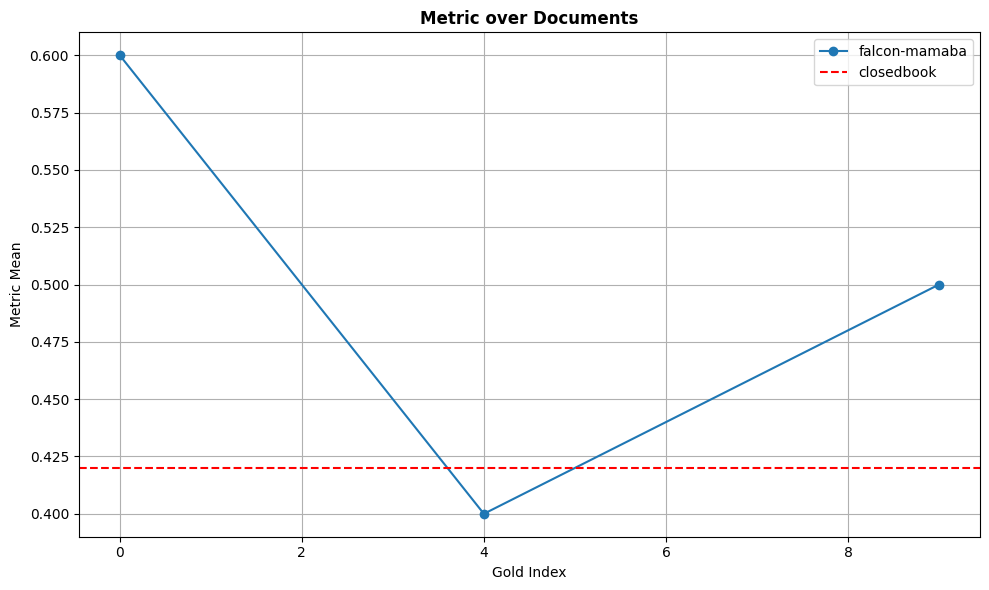

In [31]:
plot_metric_over_documents([0, 4, 9], [[0.6, 0.4, 0.5]], ["falcon-mamaba"], closedbook_mean=0.42)

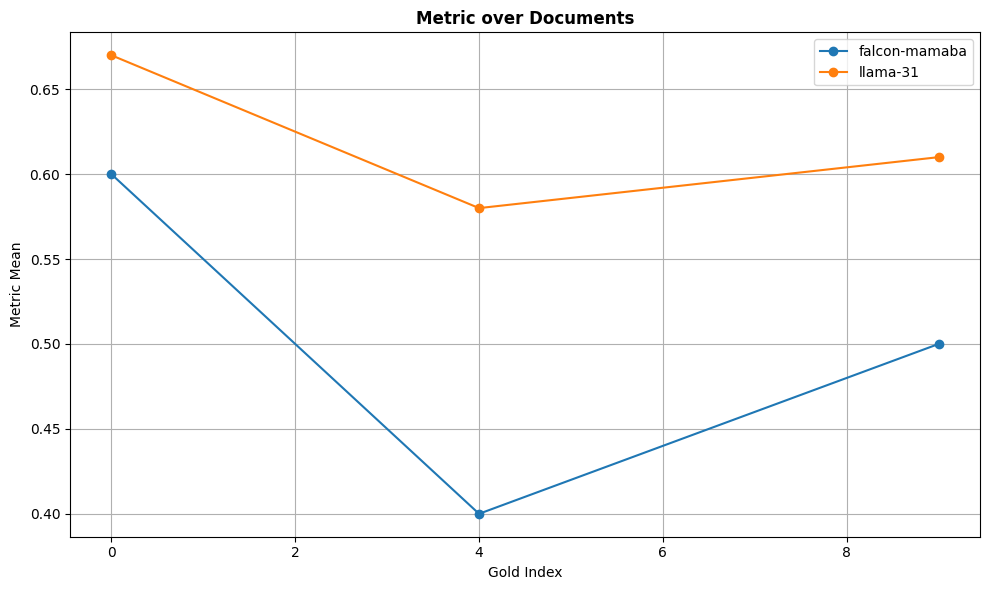

In [32]:
plot_metric_over_documents([0, 4, 9], [[0.6, 0.4, 0.5], [0.67, 0.58, 0.61]], ["falcon-mamaba", "llama-31"])

# Falcon3-Mamba-7B-Instruct Analysis (SSM)

# Llama-3.1-8B-Instruct Analysis (LLM)

# Falcon - Llama Comparison (SSM vs LLM)